In [6]:
%matplotlib inline
import math
import os,sys
import warnings
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import Image
from dmba import classificationSummary
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from dmba import plotDecisionTree, regressionSummary, classificationSummary
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
DATA = Path('.').resolve().parent / 'data'

/home/gamer456148/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
df  = pd.read_csv("/home/gamer456148/Downloads/eBayAuctions.csv")
print (df.head())

           Category currency  sellerRating  Duration endDay  ClosePrice  \
0  Music/Movie/Game       US          3249         5    Mon        0.01   
1  Music/Movie/Game       US          3249         5    Mon        0.01   
2  Music/Movie/Game       US          3249         5    Mon        0.01   
3  Music/Movie/Game       US          3249         5    Mon        0.01   
4  Music/Movie/Game       US          3249         5    Mon        0.01   

   OpenPrice  Competitive?  
0       0.01             0  
1       0.01             0  
2       0.01             0  
3       0.01             0  
4       0.01             0  


In [8]:
intColumns = [c for c in df.columns if df[c].dtype == 'int']
df[intColumns] = df[intColumns].astype('float64')
train_df, valid_df = train_test_split(df, test_size=0.4, random_state=1)
print('Training set:', train_df.shape, 'Validation set:', valid_df.shape)
# Split data example from previous assignment
outcome = 'Competitive?'
predictors = list(df.columns)

Training set: (1183, 8) Validation set: (789, 8)


In [9]:
intColumns = [c for c in df.columns if df[c].dtype == 'int']

In [10]:
print (df.dtypes) 

Category         object
currency         object
sellerRating    float64
Duration        float64
endDay           object
ClosePrice      float64
OpenPrice       float64
Competitive?    float64
dtype: object


In [11]:
# df['currency'] = df.currency.astype(float)
# df['currency'] = df.currency.astype(int(float))
# Kept running into type error

In [12]:
outcome = 'Competitive?'
predictors = list(df.columns)
predictors.remove(outcome)
# scaler = preprocessing.StandardScaler()
# scaler.fit(train_df[predictors])
# train_X = scaler.transform(train_df[predictors])
# train_y = train_df[outcome]
# valid_X = scaler.transform(valid_df[predictors])
# valid_y = valid_df[outcome]

In [13]:
auction_df = pd.read_csv("/home/gamer456148/Downloads/eBayAuctions.csv")
columns = ['Category','currency','sellerRating','Duration','endDay','ClosePrice','OpenPrice', 'Competitive?']
auction_df = auction_df[columns]
auction_df = pd.get_dummies(auction_df, drop_first=True)
auction_df.head()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,...,Category_SportingGoods,Category_Toys/Hobbies,currency_GBP,currency_US,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed
0,3249,5,0.01,0.01,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,3249,5,0.01,0.01,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,3249,5,0.01,0.01,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,3249,5,0.01,0.01,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,3249,5,0.01,0.01,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [14]:
X = auction_df.drop(columns='Competitive?')
y = auction_df['Competitive?']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
print('Training set:', train_X.shape, 'Validation set:', valid_X.shape)

Training set: (1183, 29) Validation set: (789, 29)


Tree has 279 nodes


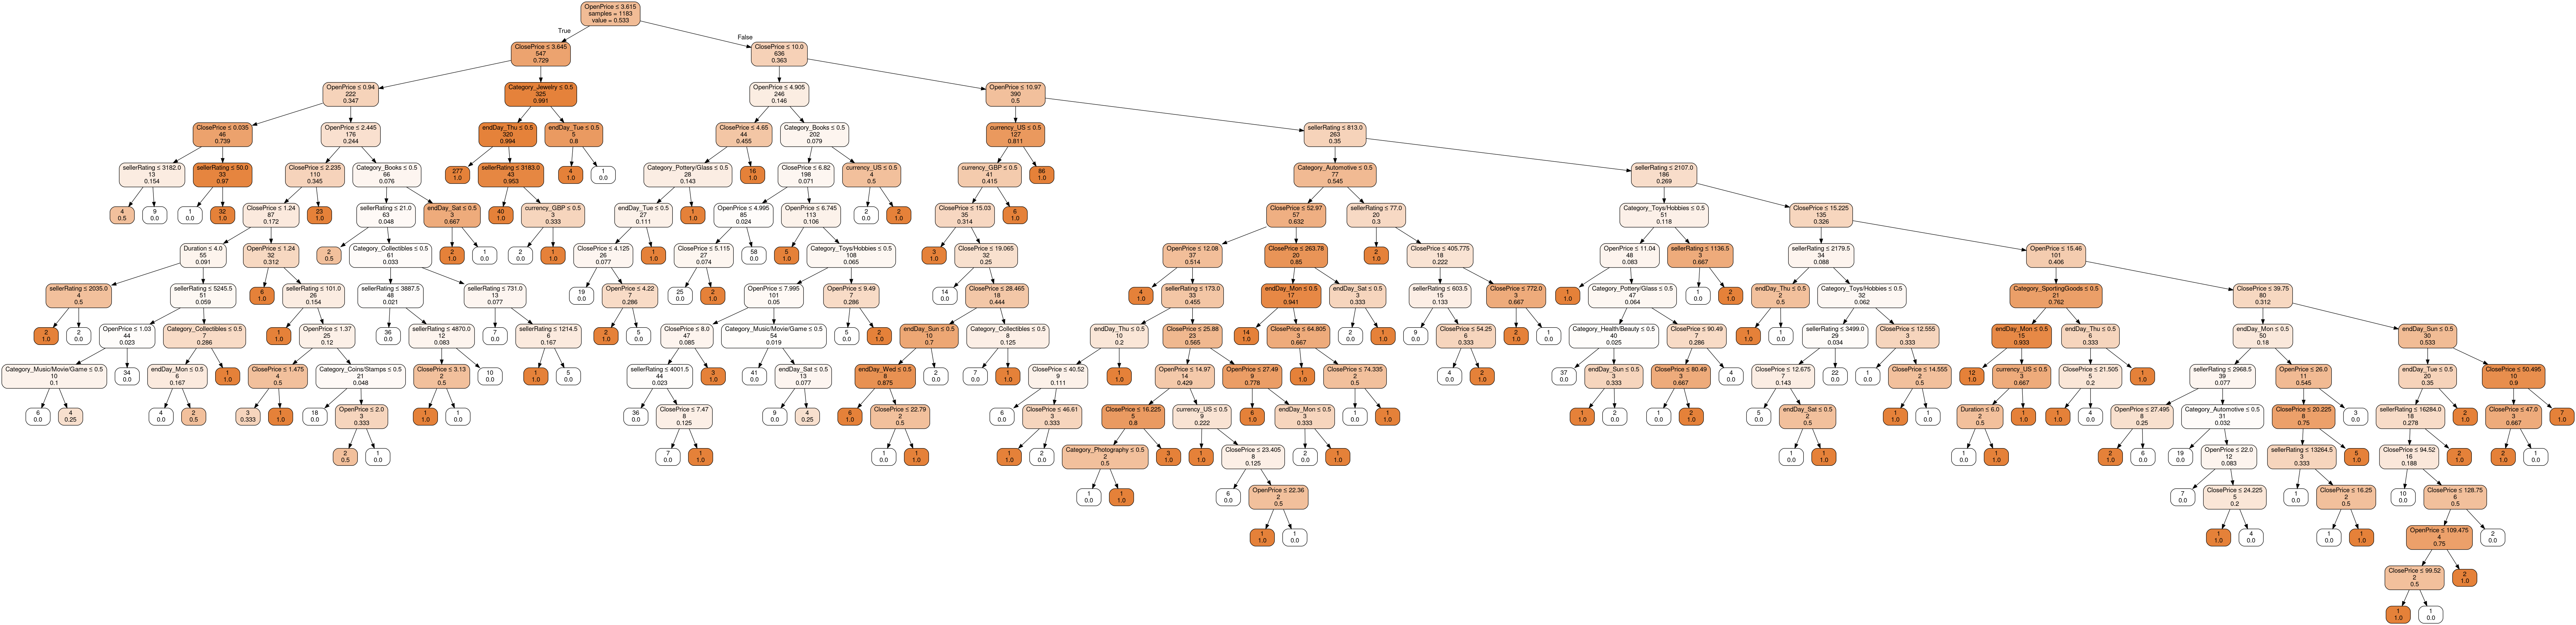

In [15]:
deepTree = DecisionTreeRegressor(random_state=1)
deepTree.fit(train_X, train_y)
print('Tree has {} nodes'.format(deepTree.tree_.node_count))
plotDecisionTree(deepTree, feature_names=train_X.columns, impurity=False)

In [24]:
deepClassTree = DecisionTreeClassifier(random_state=1)
deepClassTree.fit(train_X, train_y)
classificationSummary(train_y, deepClassTree.predict(train_X))
classificationSummary(valid_y, deepClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9932)

       Prediction
Actual   0   1
     0 553   0
     1   8 622
Confusion Matrix (Accuracy 0.8758)

       Prediction
Actual   0   1
     0 315  38
     1  60 376


In [16]:
from sklearn.ensemble import AdaBoostClassifier

In [17]:
from sklearn.datasets import make_classification

In [18]:
clf = AdaBoostClassifier(n_estimators=100, random_state=1)

In [19]:
deepTree = AdaBoostClassifier(random_state=1)
deepTree.fit(train_X, train_y)

AdaBoostClassifier(random_state=1)

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
af = AdaBoostClassifier()
af.fit(train_X, train_y)
n_nodes = af.estimators_[0].tree_.node_count
print('Tree has {} nodes'.format(n_nodes))

Tree has 3 nodes


In [26]:
deepClassTree = AdaBoostClassifier(random_state=1)
deepClassTree.fit(train_X, train_y)
classificationSummary(train_y, deepClassTree.predict(train_X))
classificationSummary(valid_y, deepClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8884)

       Prediction
Actual   0   1
     0 518  35
     1  97 533
Confusion Matrix (Accuracy 0.8695)

       Prediction
Actual   0   1
     0 331  22
     1  81 355


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
rf = RandomForestClassifier()
rf.fit(train_X, train_y)
n_nodes = rf.estimators_[0].tree_.node_count
print('Tree has {} nodes'.format(n_nodes))
# https://stackoverflow.com/questions/48870380/randomforestclassifier-object-has-no-attribute-tree/48877662#48877662

Tree has 451 nodes


In [29]:
rf = RandomForestClassifier(random_state=1)
rf.fit(train_X, train_y)
classificationSummary(train_y, rf.predict(train_X))
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.9932)

       Prediction
Actual   0   1
     0 550   3
     1   5 625
Confusion Matrix (Accuracy 0.8644)

       Prediction
Actual   0   1
     0 320  33
     1  74 362


In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
bc = BaggingClassifier()
bc.fit(train_X, train_y)
n_nodes = bc.estimators_[0].tree_.node_count
print('Tree has {} nodes'.format(n_nodes))

Tree has 201 nodes


In [30]:
bc = BaggingClassifier(random_state=1)
bc.fit(train_X, train_y)
classificationSummary(train_y, bc.predict(train_X))
classificationSummary(valid_y, bc.predict(valid_X))

Confusion Matrix (Accuracy 0.9915)

       Prediction
Actual   0   1
     0 551   2
     1   8 622
Confusion Matrix (Accuracy 0.8758)

       Prediction
Actual   0   1
     0 333  20
     1  78 358


In [23]:
# Source, previous assignment example
# Please also see https://github.com/Mentors4EDU/Python-Notebooks/blob/main/Practice/Practice5.ipynb

In [40]:
df.describe()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926268,0.540568
std,5973.011033,2.052906,89.493858,38.856149,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


In [42]:
mean1 = df['Competitive?'].mean()
sum1 = df['Competitive?'].sum()
max1 = df['Competitive?'].max()
min1 = df['Competitive?'].min()
count1 = df['Competitive?'].count()
median1 = df['Competitive?'].median() 
std1 = df['Competitive?'].std() 
var1 = df['Competitive?'].var()  
print ('Mean price ' + str(mean1))
print ('Sum of price: ' + str(sum1))
print ('Max price: ' + str(max1))
print ('Min price: ' + str(min1))
print ('Count of prices: ' + str(count1))
print ('Median price: ' + str(median1))
print ('Std of prices: ' + str(std1))
print ('Var of sprice: ' + str(var1))
# Source: https://datatofish.com/use-pandas-to-calculate-stats-from-an-imported-csv-file/
groupby_mean1 = df.groupby(['sellerRating']).mean() 
groupby_count1 = df.groupby(['sellerRating']).count()
groupby_mean2 = df.groupby(['OpenPrice']).mean() 
groupby_count2 = df.groupby(['OpenPrice']).count()
print ('Sum of values, grouped by sellerRating: ' + str(groupby_mean1))
print ('Sum of values, grouped by OpenPrice: ' + str(groupby_mean2))

Mean price 0.5405679513184585
Sum of price: 1066.0
Max price: 1.0
Min price: 0.0
Count of prices: 1972
Median price: 1.0
Std of prices: 0.49847792880639635
Var of sprice: 0.24848024550711473
Sum of values, grouped by sellerRating:                Duration  ClosePrice  OpenPrice  Competitive?
sellerRating                                                
0.0           10.000000  590.000000  99.000000      1.000000
1.0            5.500000   90.293750  20.082500      1.000000
4.0            8.333333  308.016667  41.403333      1.000000
5.0            7.500000   41.575000  13.070000      0.500000
6.0            5.000000  241.030000  15.985000      0.500000
...                 ...         ...        ...           ...
25433.0        6.485714   11.783429  11.747429      0.085714
27132.0        5.000000  120.436522   2.033696      1.000000
30594.0        3.000000    9.990000   9.990000      0.000000
34343.0        1.000000    0.110000   0.010000      1.000000
37727.0        7.000000    5.812500  

In [43]:
# I had trouble experimenting w/ the lift chart
# https://www.datavedas.com/model-evaluation-in-python/
# https://www.statisticshowto.com/decile/
# decile rank is by percentile, so assume you measure by rank accuracy
print('Rainforest and Decisiontrees are tied, with the highest accuracy')

Rainforest and Decisiontrees are tied, with the highest accuracy


In [44]:
print('BaggedTree did lower then Rainforest, the # of nodes are much less so less validation and training')

BaggedTree did lower then Rainforest, the # of nodes are much less so less validation and training


In [45]:
print('However, faster output')

However, faster output
